In [1]:
import numpy as np
import pandas as pd

#1.0.1 import required libraries for visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sn

#1.0.2 import required libraries clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
#from yellowbrick.cluster import SilhouetteVisualizer

#1.0.3 import required libraries for classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
mdata=pd.read_csv("train.csv")

In [3]:
#Displaying the data types
mdata.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
##Displaying the table data
mdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Displaying dimensions 
mdata.shape

(2000, 21)

In [6]:
#Displaying descriptive statistics of DataFrame
mdata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
# Calculating the Missing Values

df_null = mdata.isnull().sum()
df_null

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Data visualization

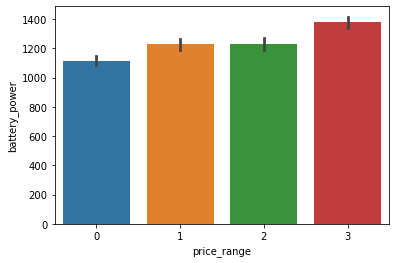

In [8]:
#2.0.0 grouping battery power with price_range
df=mdata[['price_range']].groupby(mdata['battery_power']).sum()
df.reset_index(inplace=True)
sn.barplot(data=df,y=mdata['battery_power'], x=mdata['price_range']);

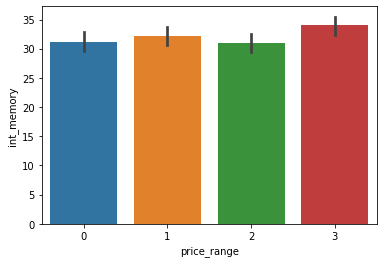

In [9]:
#2.0.1 grouping int_memory power with price_range
grp=mdata[['price_range']].groupby(mdata['int_memory']).sum()
sn.barplot(data=grp, x=mdata['price_range'], y=mdata['int_memory']);

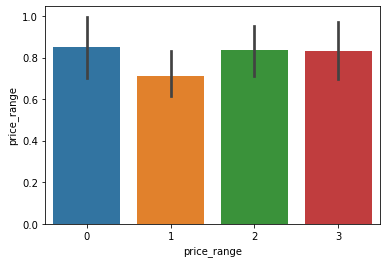

In [10]:
#2.0.2 analysing RAM with price_range
rp=mdata['price_range'].groupby(mdata['ram']).sum()
sn.barplot(data=rp, x=mdata['price_range'], y=mdata['ram']);

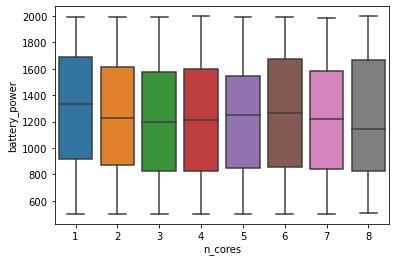

In [11]:
#2.0.3 comparing battery power with n_cores
sn.boxplot(data=mdata, x=mdata['n_cores'], y=mdata['battery_power']);

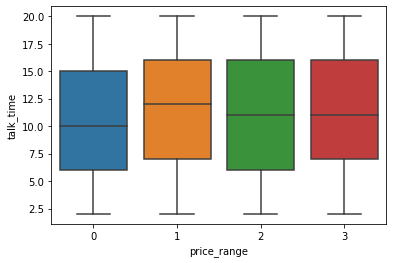

In [12]:
#3.0.0 Analysing talk_time values with price_range
sn.boxplot(x=mdata['price_range'], y=mdata['talk_time'],  data=mdata);

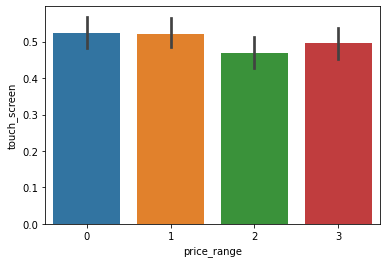

In [13]:
#3.0.1 Checking touch_screen feature with price_range
tp=mdata[['price_range']].groupby(mdata['touch_screen']).sum()
tp.reset_index(inplace=True)
sn.barplot(data=tp,x=mdata['price_range'], y=mdata['touch_screen']);

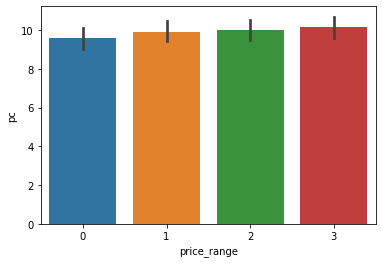

In [14]:
#3.0.3 Analysing primary camera with price_range
pc_cam=mdata[['price_range']].groupby(mdata['pc']).sum()
sn.barplot(data=pc_cam,x=mdata['price_range'], y=mdata['pc'] );

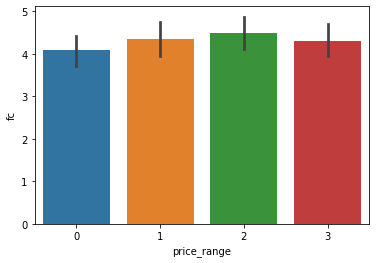

In [15]:
#3.0.4 Comparing front camera with price_range
fc_cam=mdata[['price_range']].groupby(mdata['fc']).sum()
sn.barplot(data=fc_cam,x=mdata['price_range'], y=mdata['fc'] );

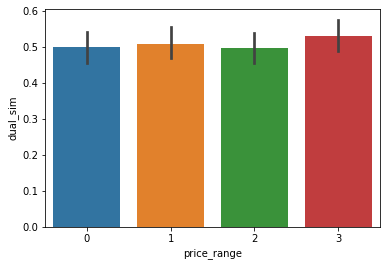

In [16]:
#4.0.0 Checking dual_sim feature with price_range diffrences
sn.barplot(data=mdata, x=mdata['price_range'], y=mdata['dual_sim']);

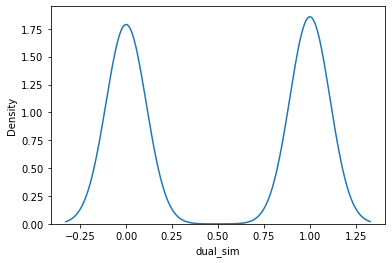

In [17]:
#4.0.1 number of dual_sim feature phones
sn.kdeplot(data=mdata, x=mdata['dual_sim']);

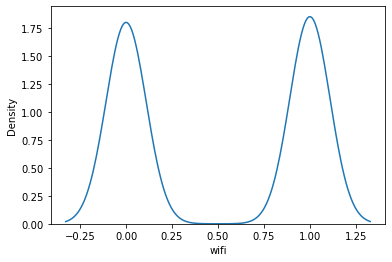

In [18]:
#4.0.1 number of wifi enabled phones
sn.kdeplot(data=mdata, x=mdata['wifi']);

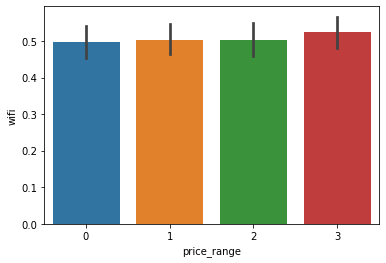

In [19]:
#4.0.1 Showing diffrence price_range with wifi
sn.barplot(data=mdata, x=mdata['price_range'], y=mdata['wifi']);

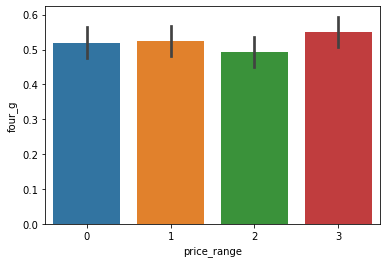

In [20]:
#4.0.1 Displaying price_range and 4G phones
sn.barplot(data=mdata, x=mdata['price_range'], y=mdata['four_g']);

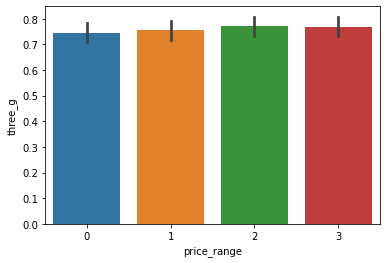

In [21]:
#4.0.1 Checking 3G supported phone with price_range
sn.barplot(data=mdata, x=mdata['price_range'], y=mdata['three_g']);

# Building the Model

In [22]:
#5.0.0 Clustering data preparation 
X=mdata.drop('price_range', axis=1)
y=mdata['price_range']
X.shape

(2000, 20)

In [23]:
#1.0.0 instantiate 
scaler=StandardScaler()
#1.0.1 fit_transform 
mdata_scaled = scaler.fit_transform(X)
mdata_scaled.shape

(2000, 20)

In [24]:
#kmeans object created
kmeans=KMeans(n_clusters=5, max_iter=300)
kmeans.fit(mdata_scaled)

KMeans(n_clusters=5)

# The SSE value

In [25]:
#5.0.1 checking sum of squared error
kmeans.inertia_

33321.66861125409

# Coordinates of cluster centers

In [26]:
#5.0.2 Checking cluster center values
kmeans.cluster_centers_

array([[-3.61416394e-02, -7.64744121e-03, -1.94197641e-01,
        -1.07254655e-01, -4.13512898e-01,  3.27891511e-01,
         8.30398765e-02,  5.71724271e-02,  3.24394673e-02,
         2.31846415e-02, -3.38908713e-01,  1.25455156e+00,
         1.01540156e+00,  1.58674134e-02,  2.98705760e-01,
         1.84507770e-01, -1.30158062e-01,  5.11330304e-01,
         8.81192332e-02,  1.80135301e-01],
       [-9.72916373e-02,  6.49483024e-02,  3.16583934e-02,
         2.97855966e-03, -3.20058910e-01,  3.96927569e-01,
         7.43669677e-02, -5.27549322e-02, -1.97685613e-01,
         1.05142624e-01, -2.18684593e-01, -5.08485662e-01,
        -4.90132392e-01, -7.78442539e-02,  8.86642674e-01,
         1.00661045e+00, -1.70492355e-01,  5.53194198e-01,
        -4.44623388e-02,  5.19391562e-02],
       [ 6.48978999e-02, -7.19708117e-02,  1.66838106e-02,
         8.75731854e-02, -4.95745510e-01,  2.85132579e-01,
        -1.32941825e-02,  6.01229762e-03,  3.80116343e-02,
        -9.76576317e-02, -3.8

# Number of iterations run

In [28]:
#5.0.1 Showing number of runs
kmeans.n_iter_

35

# Number of features seen during fit

In [29]:
#5.0.2 Checking number of feature
kmeans.n_features_in_

20

# Labels of each point

In [30]:
#5.0.3 Checking number of labels
cluster_labels=kmeans.labels_
cluster_labels

array([4, 0, 0, ..., 2, 1, 1])

# Calculated Silhouette score

In [31]:
#5.0.4 Checking silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels )
print("The silhouette score is: {0}".format(silhoutte_avg))

The silhouette score is: 0.05391468457069937


# Finding the Optimal Silhouette score and SSE

In [32]:
#5.1.1 optimizing the clusters 
sse=[]
s_score=[]
max_k=14
for num_custer in range(2,max_k):
  model=KMeans(n_clusters=num_custer, max_iter=60)
  model.fit(mdata_scaled)
  # SSE:Store inertia value
  sse.append(model.inertia_)
  #silhouette_score
  sc=silhouette_score(mdata_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)

# Scree plot and Silhoutte score:

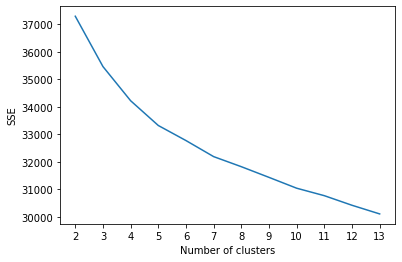

In [33]:
#5.1.2 plotting of silhouette score
plt.plot(range(2,max_k), sse )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [34]:
s_score

[0.0685863186097075,
 0.0654451113745535,
 0.0572213161458586,
 0.05475314342959007,
 0.05044594441411988,
 0.049727258490350465,
 0.04653457872551915,
 0.04578749629606051,
 0.048349414567536456,
 0.04259578214354963,
 0.04477062879866076,
 0.04591694516886025]

# Silhouette Coefficient plot:

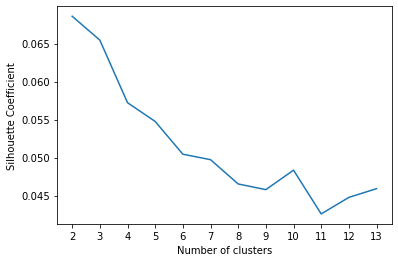

In [35]:
#5.1.4 Analysing silhouette score on plot
plt.plot(range(2,max_k), s_score )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [36]:
#6.0.0 Silhouette score for samples
sample_silhouette_values = silhouette_samples(X, cluster_labels)
print("The sample_silhouette_values: {0}".format(sample_silhouette_values))

The sample_silhouette_values: [-0.12431103  0.12458115  0.14950154 ... -0.08249196  0.05258048
 -0.04095089]


# Classification & Modeling

In [38]:
#7.0.0 Preparing the classification data
X=mdata.iloc[:, 1:-1].values
y=mdata.iloc[:,-1]

In [39]:
#7.0.0 instantiate object
ss=StandardScaler()
#7.0.1 Train object on data
ss.fit(X)
#7.0.1 Transform data
X=ss.transform(X)

In [40]:
#8.0.0 Split X and y into train and test data:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, shuffle=True, random_state=20)

# Explore the testsplit data result:

In [41]:
#8.0.1 dimensions of X train data
X_train.shape

(1600, 19)

In [42]:
#8.0.2 dimensions of x test data
X_test.shape

(400, 19)

In [43]:
#8.0.3 Displaying x train data
X_train

array([[-0.9900495 , -1.00790612,  0.98117712, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.0100505 ,  0.21788424, -1.01918398, ...,  0.55964063,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       ...,
       [-0.9900495 ,  0.70820038,  0.98117712, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.9900495 , -0.76274805, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
         0.99401789, -1.01409939]])

# Decision tree & Modeling:

In [44]:
#4.0.0 Start modeling
dtree=DecisionTreeClassifier(criterion="gini", max_depth=None)

In [45]:
#4.0.1 Train our decision tree
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions

In [47]:
# 4.0.2 Make predictions of test data
y_te = dtree.predict(X_test)
y_te

array([2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 0, 2, 3, 2, 2, 1, 3, 1, 2, 3, 3, 2,
       0, 0, 3, 2, 3, 1, 2, 1, 3, 2, 0, 2, 0, 0, 3, 1, 2, 0, 1, 3, 3, 1,
       0, 2, 1, 0, 3, 0, 3, 0, 1, 1, 1, 0, 3, 1, 1, 3, 3, 1, 2, 1, 0, 2,
       0, 3, 0, 1, 1, 3, 3, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1,
       2, 1, 3, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1,
       1, 2, 2, 0, 3, 3, 3, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 2, 2, 2, 1, 2, 1, 3, 2, 1, 0, 1, 3, 1, 2, 0, 2, 0, 1, 0,
       3, 3, 2, 2, 0, 2, 0, 0, 3, 3, 3, 2, 1, 2, 3, 3, 1, 1, 2, 1, 1, 3,
       1, 2, 0, 3, 2, 1, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 1, 2, 2, 1, 1, 3,
       2, 2, 1, 0, 0, 3, 2, 2, 2, 3, 2, 0, 3, 3, 1, 3, 0, 0, 2, 2, 2, 3,
       2, 0, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 1, 1, 0, 3, 0, 2, 3, 0, 2, 1,
       1, 2, 3, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 3, 1, 3, 2, 0, 1, 3, 2, 0,
       1, 1, 1, 1, 1, 3, 0, 0, 1, 0, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 0, 0,
       1, 3, 2, 2, 3, 3, 3, 1, 0, 3, 0, 1, 2, 2, 3,

In [48]:
# 4.0.3 Get accuracy

np.sum((y_test == y_te))/y_test.size 

0.7325

# Decision tree plot

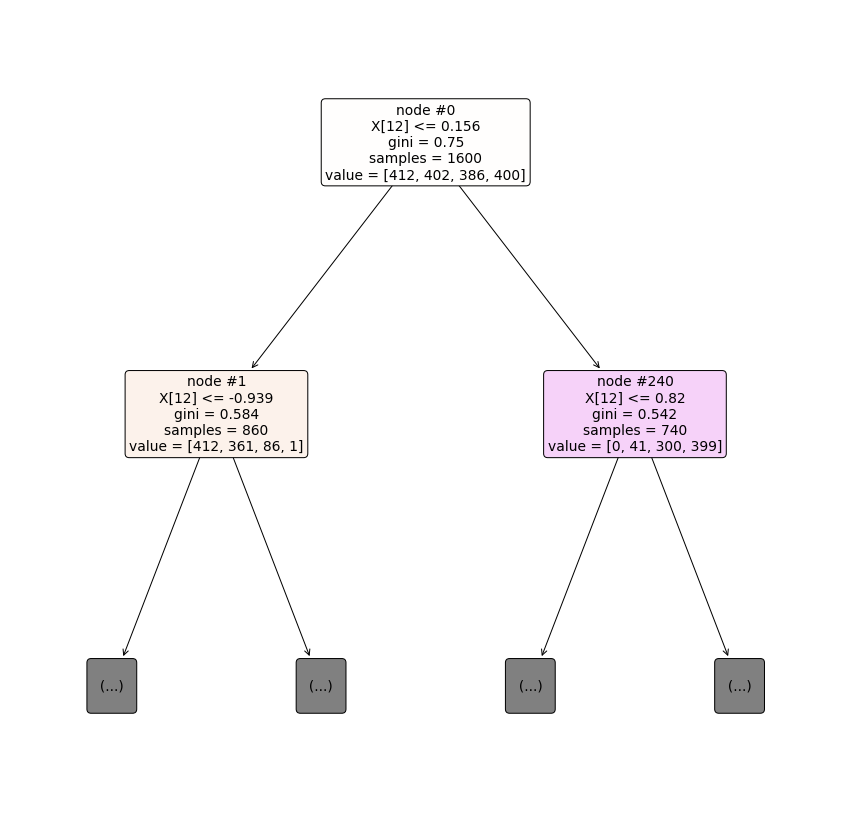

In [49]:
#5.0.0 plot decision tree
plt.figure(figsize=(15,15))
plot_tree(dtree, max_depth = 1,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
          )
plt.show()